In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [21]:
bank_chumers = pd.read_csv('./BankChurners.csv')

In [22]:
bank_chumers.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [23]:
selected_columns = ['Credit_Limit', 'Months_on_book', 'Card_Category']

# Filtrando o dataset
filtered_data = bank_chumers[selected_columns]

# Convertendo variáveis categóricas em numéricas com one-hot encoding
data_encoded = pd.get_dummies(filtered_data, columns=['Card_Category'])

# Normalizando as variáveis numéricas ('Total' e 'Rating')
scaler = StandardScaler()
data_encoded[['Credit_Limit', 'Months_on_book']] = scaler.fit_transform(data_encoded[['Credit_Limit', 'Months_on_book']])

data_encoded.head(100)



,Credit_Limit,Months_on_book,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.446622,0.384621,True,False,False,False
1,-0.041367,1.010715,True,False,False,False
2,-0.573698,0.008965,True,False,False,False
3,-0.585251,-0.241473,True,False,False,False
4,-0.430877,-1.869317,True,False,False,False
...,...,...,...,...,...,...
95,-0.761741,2.012465,True,False,False,False
96,-0.569737,-0.116254,True,False,False,False
97,-0.532876,-0.116254,True,False,False,False
98,0.116308,1.762028,True,False,False,False


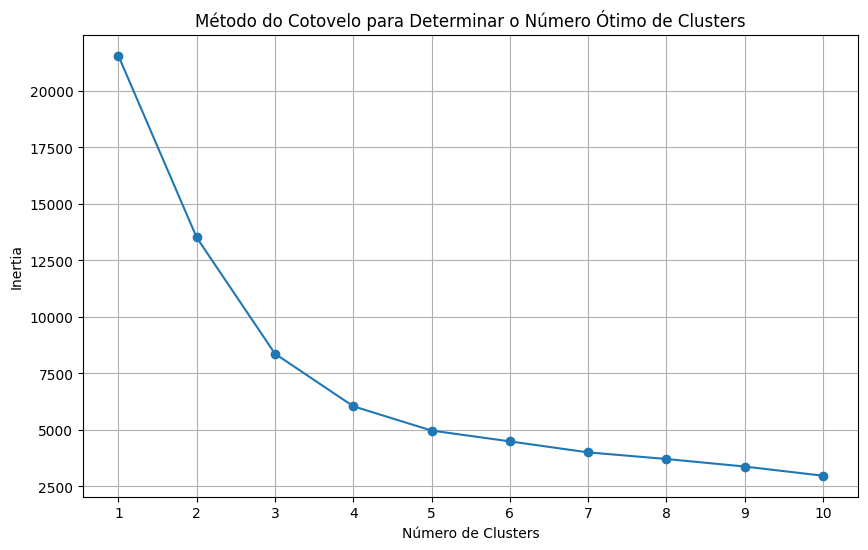

In [24]:
#Aplicando o método do cotovelo para encontrar o número ótimo de clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encoded)
    inertia.append(kmeans.inertia_)

# Plotando o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo para Determinar o Número Ótimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [25]:
# Aplicando o método k-means para os dados do conjunto de dados
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_encoded)

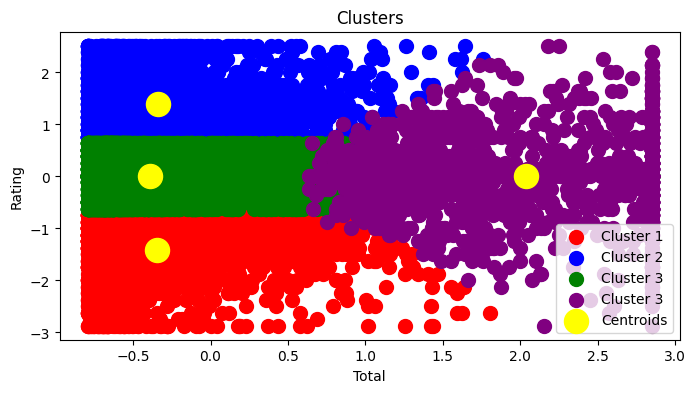

In [26]:
#Plotando os clusters
plt.figure(figsize=(8, 4))
plt.scatter(data_encoded.iloc[pred_y == 0, 0], data_encoded.iloc[pred_y == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_encoded.iloc[pred_y == 1, 0], data_encoded.iloc[pred_y == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_encoded.iloc[pred_y == 2, 0], data_encoded.iloc[pred_y == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(data_encoded.iloc[pred_y == 3, 0], data_encoded.iloc[pred_y == 3, 1], s=100, c='purple', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters')
plt.xlabel('Total')
plt.ylabel('Rating')
plt.legend()
plt.show()

In [27]:
bank_chumers['Cluster'] = kmeans.labels_
cluster_distribution = bank_chumers['Cluster'].value_counts().sort_index()

# Exibindo a distribuição dos clusters
cluster_distribution

Cluster
0    1978
1    1928
2    4667
3    1554
Name: count, dtype: int64